In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
file = [i.strip() for i in open("../data/yeast_graph.txt", 'r').readlines()]

In [4]:
graph = nx.Graph()

In [5]:
for line in file:
    l = line.split('\t')
    graph.add_edge(l[0], l[1], weight = float(l[2]))

In [6]:
graph.number_of_edges()

712

In [7]:
graph.number_of_nodes()

300

In [8]:
nx.number_connected_components(graph)

53

В графе 53 связанные компоненты

In [9]:
print("Размеры связных компонент графа:")
for i, comp in enumerate(nx.connected_components(graph)):
    print(i, len(comp))

Размеры связных компонент графа:
0 4
1 19
2 104
3 3
4 3
5 2
6 2
7 30
8 3
9 3
10 2
11 6
12 7
13 2
14 6
15 10
16 2
17 3
18 4
19 2
20 3
21 2
22 4
23 2
24 3
25 6
26 5
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 3
38 4
39 2
40 2
41 2
42 2
43 2
44 5
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 2


Text(0.5, 1.0, 'Degrees distribution')

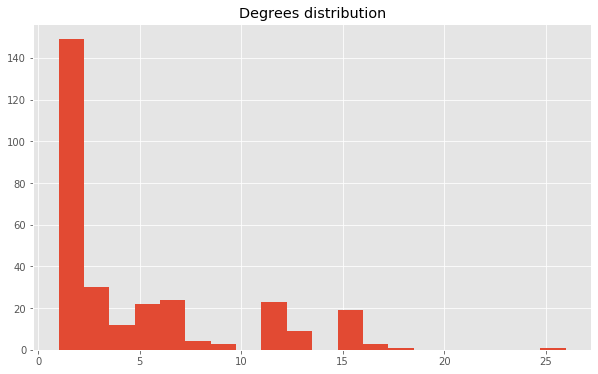

In [10]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.hist(dict(graph.degree).values(), bins=20)
plt.title("Degrees distribution")

In [11]:
nx.diameter(graph)

NetworkXError: Found infinite path length because the graph is not connected

Диаметр графа равен бесконечности

In [13]:
biggest_comp = max(nx.connected_component_subgraphs(graph), key=len)

In [14]:
nx.diameter(biggest_comp)

13

Диаметр самой большой связной компоненты графа - 13

In [22]:
!pip install --user python-louvain

  Created wheel for python-louvain: filename=python_louvain-0.14-cp37-none-any.whl size=9292 sha256=1a3be97e22d1f60d62cd61d4b4cb9610aadadac8c2b0f8a338bd0a67c8eca9d4
  Stored in directory: /home/lera/.cache/pip/wheels/e7/8d/24/6b3a464bb23e96ecba3f68868e85721534fd8158a9cd7b426b
Successfully built python-louvain


In [27]:
from community import community_louvain

In [28]:
part = community_louvain.best_partition(graph)

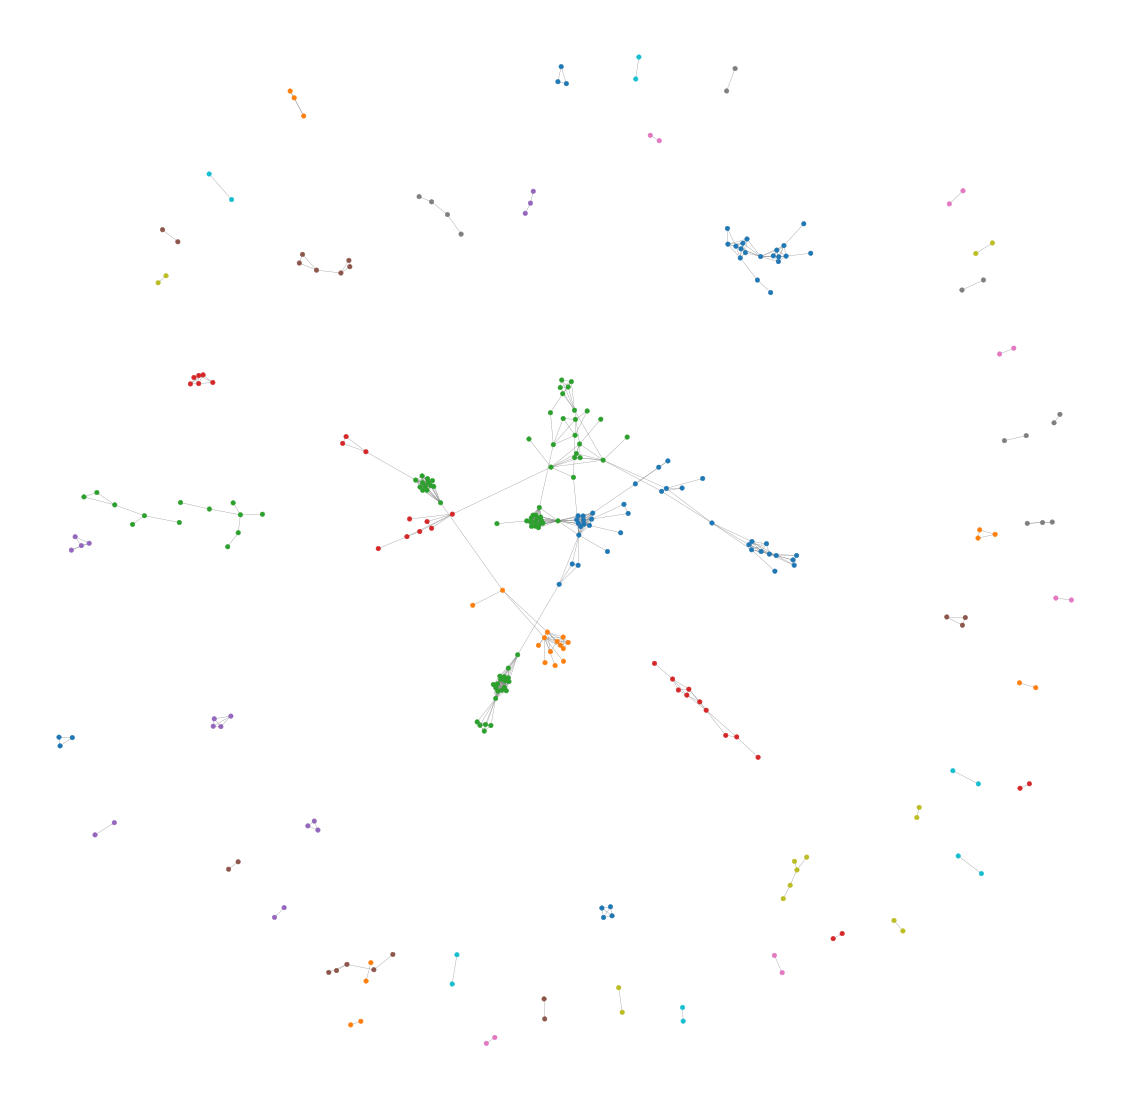

In [59]:
values = [part.get(node) for node in graph.nodes()]
pos = nx.spring_layout(graph)

plt.rcParams['figure.figsize'] = [20, 20]
nx.draw_networkx(graph, pos = pos, 
                 cmap = plt.get_cmap('tab10'), node_color = values,
                 node_size=20, width=0.3, edge_color='grey', with_labels=False)
limits=plt.axis('off') 

In [50]:
{i:list(part.values()).count(i)  for i in set(part.values())} #количество белков в каждой группе

{0: 4,
 1: 19,
 2: 16,
 3: 3,
 4: 21,
 5: 3,
 6: 2,
 7: 2,
 8: 14,
 9: 3,
 10: 3,
 11: 2,
 12: 21,
 13: 13,
 14: 6,
 15: 17,
 16: 7,
 17: 22,
 18: 2,
 19: 6,
 20: 10,
 21: 2,
 22: 7,
 23: 3,
 24: 3,
 25: 4,
 26: 2,
 27: 3,
 28: 2,
 29: 4,
 30: 2,
 31: 3,
 32: 6,
 33: 5,
 34: 2,
 35: 2,
 36: 2,
 37: 2,
 38: 2,
 39: 2,
 40: 2,
 41: 2,
 42: 2,
 43: 2,
 44: 3,
 45: 4,
 46: 2,
 47: 2,
 48: 2,
 49: 2,
 50: 2,
 51: 5,
 52: 2,
 53: 2,
 54: 2,
 55: 2,
 56: 2,
 57: 2,
 58: 2,
 59: 2}

In [81]:
for v in set(part.values()):
    print(v)
    for key,value in part.items():
        if value == v:
            print(key)

0
YKL166C
YIL033C
YPL203W
YJL164C
1
YCR002C
YHR107C
YJR076C
YLR314C
YDL225W
YDR218C
YOL090W
YDR097C
YCR092C
YAR007C
YNL312W
YJL173C
YGR059W
YNL082W
YDL156W
YER095W
YDR076W
YJL060W
YLR131C
2
YNL290W
YOL094C
YBR087W
YJR068W
YOR217W
YBL035C
YIR008C
YKL045W
YNL102W
YPR175W
YBR278W
YNL262W
YOR144C
YMR078C
YCL042W
YPR167C
3
YOR212W
YJR086W
YHR005C
4
YCL029C
YER016W
YLR045C
YJL042W
YOR272W
YLR175W
YDR016C
YGL061C
YBL034C
YOR265W
YMR138W
YPL241C
YJR089W
YKL049C
YKL089W
YOR058C
YKR037C
YDR060W
YBL032W
YDL117W
YPL032C
5
YPR018W
YBR195C
YML102W
6
YOR132W
YOR069W
7
YGR092W
YIL106W
8
YBR160W
YMR199W
YPL256C
YDL155W
YPR119W
YBR135W
YPR120C
YAL040C
YGR108W
YGR109C
YLR210W
YLR079W
YPL014W
YJL187C
9
YFR015C
YLR258W
YJL137C
10
YJR093C
YPR107C
YAL043C
11
YOR269W
YLR254C
12
YBR126C
YML100W
YBR060C
YHR118C
YLL004W
YNL261W
YPR162C
YDR074W
YMR261C
YLR274W
YGL201C
YML065W
YBL023C
YEL032W
YBR202W
YPR019W
YJL194W
YDL017W
YDR052C
YLR103C
YIL177C
13
YBL084C
YLR127C
YGL240W
YHR166C
YKL022C
YNL172W
YDL008W
YDR118W
